# Introduction



---



---



---



---


From:

https://www.kaggle.com/aungpyaeap/fish-market


---



Content

This dataset is a record of 7 common different fish species in fish market sales. With this dataset, a predictive model can be performed using machine friendly data and estimate the weight of fish can be predicted.
Acknowledgements

Thanks to all who make Kernels using this dataset and also people viewed or download this data.


Inspiration

Multiple linear regression is a fundamental practice for this dataset. Multivariate analysis can also be performed.


---



---



---





![alt text](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F4037611%2F3c9a02ab1f5ba1bf8080e5cb2b314668%2F1-s2.0-S0141113615300817-gr2.jpg?generation=1578135455737675&alt=media)

**Pike**

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c5/Esox_lucius1.jpg/1920px-Esox_lucius1.jpg)




**Bream**

![alt text](https://www.sydneyfishmarket.com.au/Portals/0/EasyDNNNews/1251/760465p540EDNmainimg-Black-Bream.jpg)


**Smelt**

![alt text](https://www.seafoodwatch.org/-/m/sfw/images/recommendations/fish/smelt/rainbow-smelt.png?w=600&amp;mh=350&amp;bc=ffffff)

**Whitefish**

![alt text](https://www.seafoodwatch.org/-/m/sfw/images/recommendations/fish/whitefish/cornell-whitefish.png?mw=500&mh=300&bc=ffffff)

**Parkki**

![alt text](https://www.seafoodwatch.org/-/m/sfw/images/recommendations/fish/rockfish/black-rockfish.png?w=600&amp;mh=350&amp;bc=ffffff)

In [0]:
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA

import time
from sklearn.manifold import TSNE

from sklearn.datasets import fetch_openml
import umap

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

from sklearn.model_selection import train_test_split
from sklearn import datasets, metrics

from sklearn.cluster import DBSCAN
import scipy



In [0]:
PATH = 'https://raw.githubusercontent.com/brianfarrelly/data/master/Fish.csv'

fish_data = pd.read_csv(PATH)

fish_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


# EDA




---



---


---

Exploratory Data Analysis


---



---



---



In [0]:
fish = fish_data.copy()
fish.head(20)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [0]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

species = labelencoder.fit_transform(fish['Species'])
fish['species'] = labelencoder.fit_transform(fish['Species'])

fish


,Species,Weight,Length1,Length2,Length3,Height,Width,species
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0
...,...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,5
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,5
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,5
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672,5


In [0]:
fish['species'].value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: species, dtype: int64

In [0]:
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [0]:
smelt = fish[fish['species'] == 5]
bream = fish[fish['species'] == 0]
pike  = fish[fish['species'] == 3]
parkki = fish[fish['species'] == 1]
white  = fish[fish['species'] == 6]


frames = [smelt, bream, pike, parkki, white]

fish = pd.concat(frames)

In [0]:
fish.head(20)

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish
145,6.7,9.3,9.8,10.8,1.7388,1.0476,0,0,0,1,0
146,7.5,10.0,10.5,11.6,1.9720,1.1600,0,0,0,1,0
147,7.0,10.1,10.6,11.6,1.7284,1.1484,0,0,0,1,0
148,9.7,10.4,11.0,12.0,2.1960,1.3800,0,0,0,1,0
149,9.8,10.7,11.2,12.4,2.0832,1.2772,0,0,0,1,0
150,8.7,10.8,11.3,12.6,1.9782,1.2852,0,0,0,1,0
151,10.0,11.3,11.8,13.1,2.2139,1.2838,0,0,0,1,0
152,9.9,11.3,11.8,13.1,2.2139,1.1659,0,0,0,1,0
153,9.8,11.4,12.0,13.2,2.2044,1.1484,0,0,0,1,0
154,12.2,11.5,12.2,13.4,2.0904,1.3936,0,0,0,1,0


In [0]:
species = labelencoder.fit_transform(fish['Species'])
fish['species'] = labelencoder.fit_transform(fish['Species'])

In [0]:
fish['Species'].value_counts()

Bream        35
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [0]:
fish['species'].value_counts()

0    35
2    17
3    14
1    11
4     6
Name: species, dtype: int64

In [0]:
# use pd.concat to join the new columns with your original dataframe
fish = pd.concat([fish,pd.get_dummies(fish['Species'], prefix='species')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
fish.drop(['Species'],axis=1, inplace=True)
fish.drop(['species'],axis=1, inplace=True)


In [0]:
fish.head()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish
145,6.7,9.3,9.8,10.8,1.7388,1.0476,0,0,0,1,0
146,7.5,10.0,10.5,11.6,1.9720,1.1600,0,0,0,1,0
147,7.0,10.1,10.6,11.6,1.7284,1.1484,0,0,0,1,0
148,9.7,10.4,11.0,12.0,2.1960,1.3800,0,0,0,1,0
149,9.8,10.7,11.2,12.4,2.0832,1.2772,0,0,0,1,0


In [0]:
fish_corr_df = fish.copy()

fish_corr_df.corr()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish
Weight,1.000000,0.895503,0.901051,0.912436,0.638237,0.876076,0.337917,-0.324995,0.336536,-0.546019,0.046224
Length1,0.895503,1.000000,0.999514,0.992332,0.496494,0.847658,0.178181,-0.317984,0.651226,-0.663516,0.021141
Length2,0.901051,0.999514,1.000000,0.995154,0.518985,0.861105,0.200102,-0.317102,0.633410,-0.676299,0.024435
Length3,0.912436,0.992332,0.995154,1.000000,0.594155,0.896326,0.291022,-0.327251,0.571088,-0.709740,0.009822
Height,0.638237,0.496494,0.518985,0.594155,1.000000,0.833216,0.833506,-0.101321,-0.257403,-0.720818,-0.013339
Width,0.876076,0.847658,0.861105,0.896326,0.833216,1.000000,0.516876,-0.261366,0.207229,-0.790228,0.176289
species_Bream,0.337917,0.178181,0.200102,0.291022,0.833506,0.516876,1.000000,-0.333767,-0.433377,-0.384639,-0.238366
species_Parkki,-0.324995,-0.317984,-0.317102,-0.327251,-0.101321,-0.261366,-0.333767,1.000000,-0.198373,-0.176064,-0.109109
species_Pike,0.336536,0.651226,0.633410,0.571088,-0.257403,0.207229,-0.433377,-0.198373,1.000000,-0.228608,-0.141672
species_Smelt,-0.546019,-0.663516,-0.676299,-0.709740,-0.720818,-0.790228,-0.384639,-0.176064,-0.228608,1.000000,-0.125739


Looking at the heatmap below you can see the Smelt species is negatively correlated to Weight, Length1, Length2, Length3, Height and Width. The Bream species is highly correlated to the Height measurement. The Parkki species is slightly negatively correlated to all measurements. The Pike species is highly correlated to all measurements and negatively correlated to Height. This has the effect of effectively seperating species from each other on these measurement attributes.  

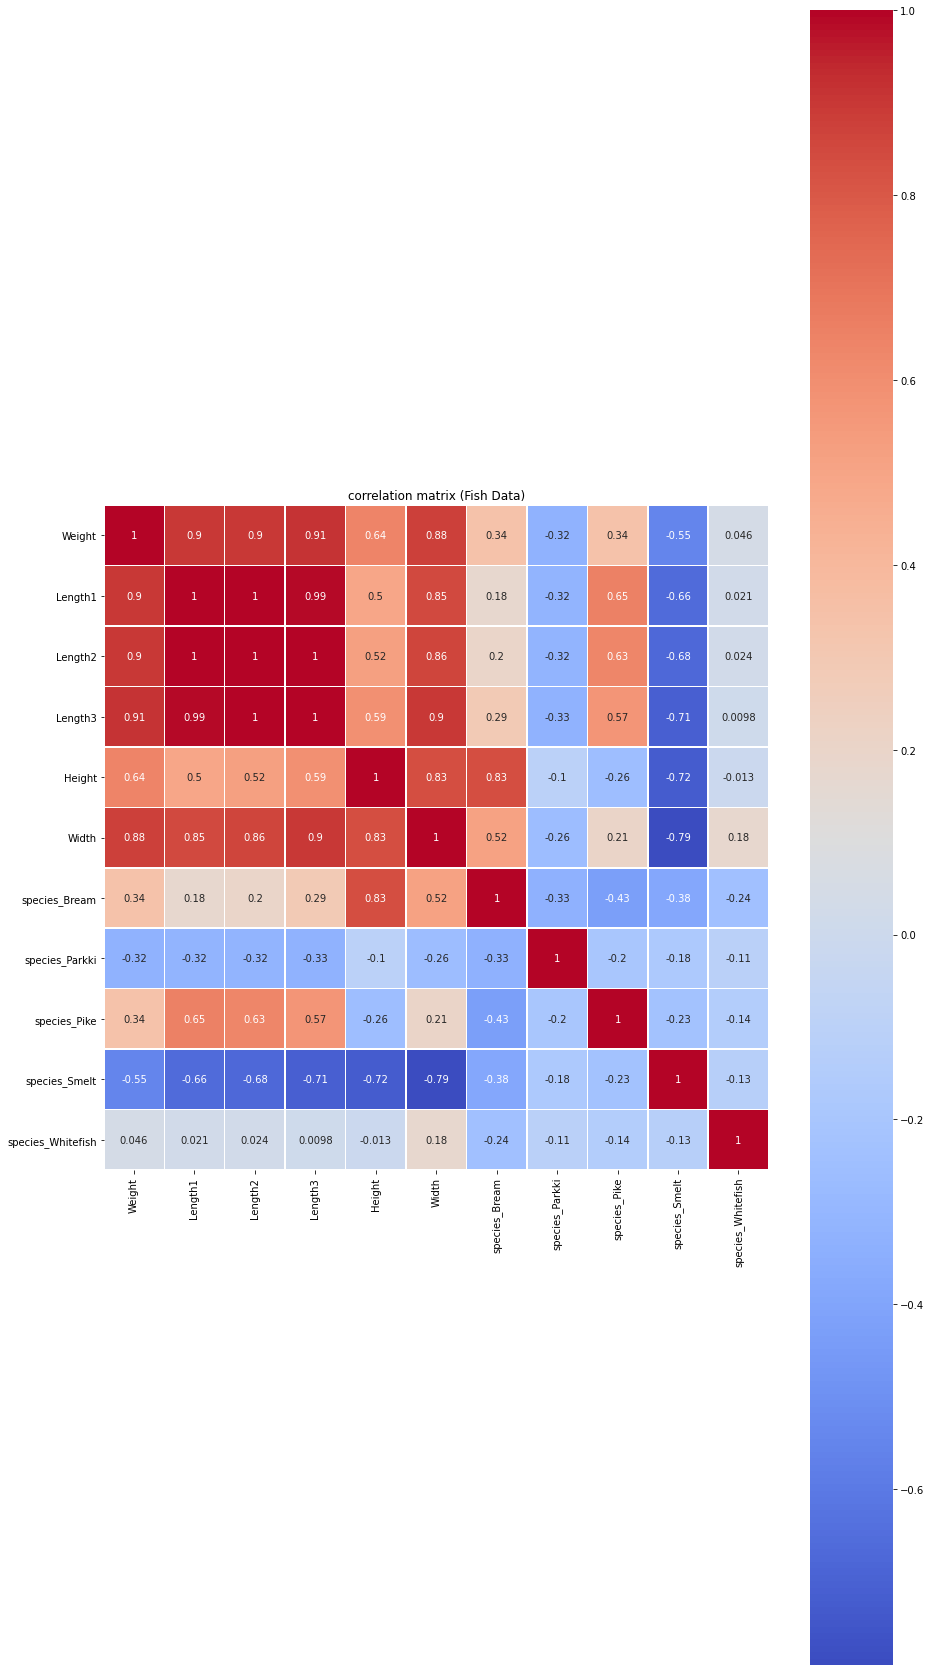

In [0]:
# make the correlation matrices.

corrmat_fish = fish_corr_df.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(140,140))

plt.subplot(4,8,4)
# draw the heatmap using seaborn.
sns.heatmap(corrmat_fish, square=True, cmap='coolwarm', annot=True, linewidths=.5)
plt.title("correlation matrix (Fish Data)")

plt.show()


In [0]:
X = fish.copy()

In [0]:
X.describe()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,468.524096,27.942169,30.248193,33.851807,10.267800,4.379069,0.421687,0.132530,0.204819,0.168675,0.072289
std,379.584329,11.395861,12.280565,13.291418,5.066365,1.742796,0.496831,0.341127,0.406023,0.376741,0.260540
min,6.700000,9.300000,9.800000,10.800000,1.728400,1.047600,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.000000,19.400000,21.100000,23.650000,6.836250,3.335000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,450.000000,29.100000,31.500000,36.200000,10.686300,4.696100,0.000000,0.000000,0.000000,0.000000,0.000000
75%,692.500000,33.600000,36.700000,40.950000,14.422600,5.584500,1.000000,0.000000,0.000000,0.000000,0.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,7.480000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
X.shape

(83, 11)

In [0]:
X.head()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish
145,6.7,9.3,9.8,10.8,1.7388,1.0476,0,0,0,1,0
146,7.5,10.0,10.5,11.6,1.9720,1.1600,0,0,0,1,0
147,7.0,10.1,10.6,11.6,1.7284,1.1484,0,0,0,1,0
148,9.7,10.4,11.0,12.0,2.1960,1.3800,0,0,0,1,0
149,9.8,10.7,11.2,12.4,2.0832,1.2772,0,0,0,1,0


In [0]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_std)
cumsum = np.cumsum(pca.explained_variance_ratio_)

d = np.argmax(cumsum >= 0.99) + 1
print(d)

d = np.argmax(cumsum >= 0.95) + 1
print(d)

d = np.argmax(cumsum >= 0.90) + 1
print(d)



5
4
4


In [0]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X.shape

(83, 11)

In [0]:
# We just want the first four principal components
pca = PCA(n_components=4)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X_std)

In [0]:
import plotly.express as px
fig = px.scatter(X, x=pca_components[:, 0], y= pca_components[:, 1], 
                 size=X['Length1'], color=species,
                  text=X['species_Pike'] )
          
fig.show()

In [0]:
import warnings
warnings.filterwarnings('ignore')

time_start = time.time()

umap_results = umap.UMAP(n_neighbors=25, min_dist=0.3, 
                      metric='correlation', n_components=2, random_state=1337).fit_transform(X_std)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 3.7815513610839844 seconds


In [0]:
import plotly.express as px
fig = px.scatter(X, x=umap_results[:, 0], y= umap_results[:, 1], 
                 size=X['Length1'], color=species,
                  text=X['species_Pike'] )
          
fig.show()

---



---



---


Running K-means clustering on the top 2 features ranked by Gradient Boost Classifier. 


---


---




---




In [0]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)

In [0]:
y = species

In [0]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X.shape

(83, 11)

Here an "elbow" curve fit plot recommends 3 or 4 clusters. Since there are 4 species I picked 4 clusters to see how they fit the kmeans. 

In [0]:

n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_std)
    cost.append(kmean.inertia_)  

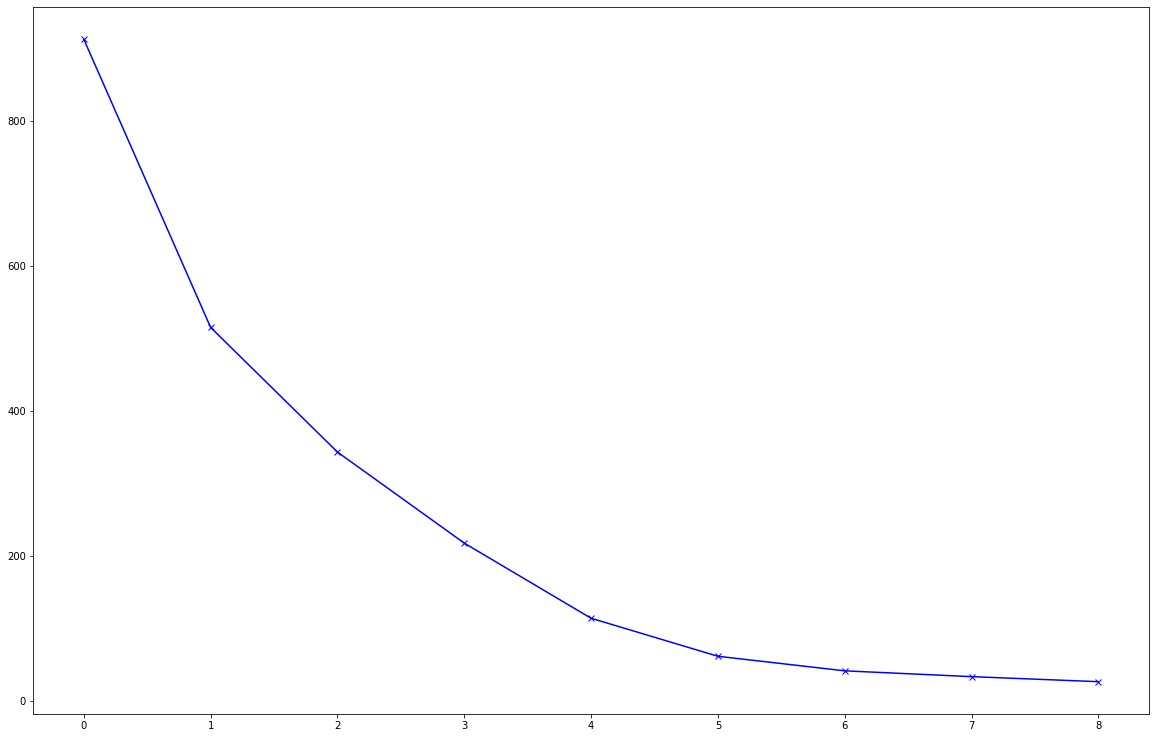

In [0]:
fig, ax = plt.subplots(figsize=(20, 13)) 

plt.plot(cost, 'bx-')

In [0]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X.shape

(83, 11)

Raw Weight and Length run through Kmeans clusters

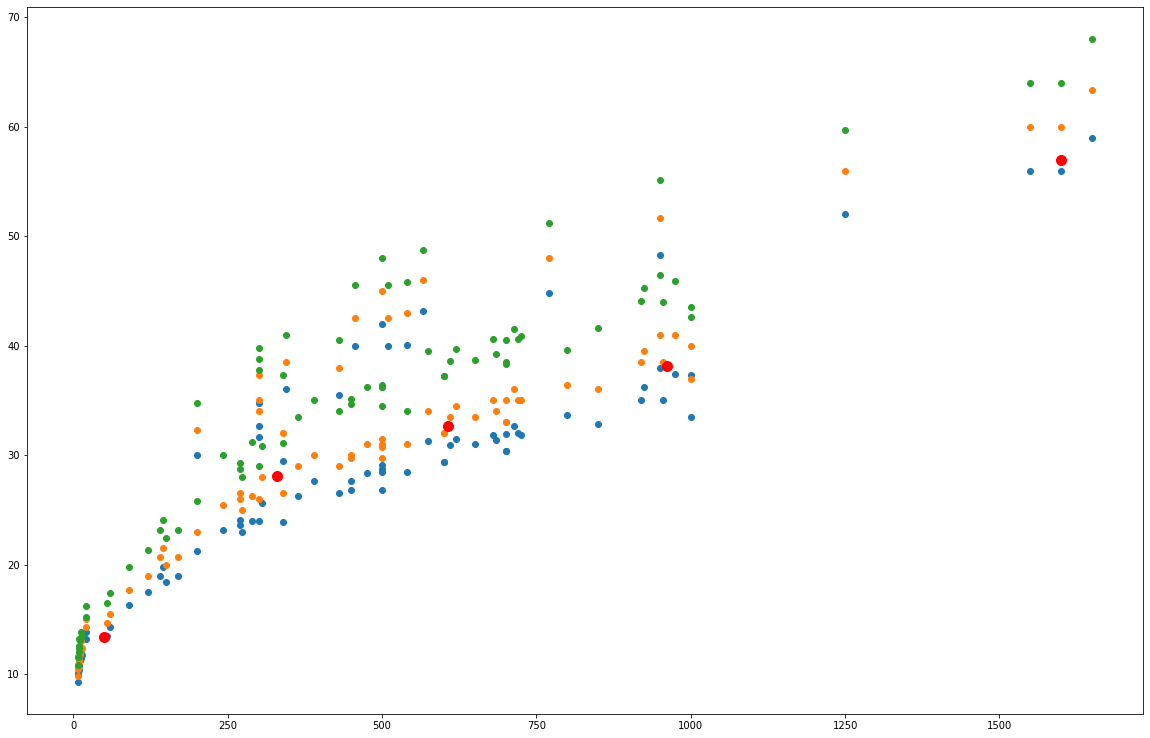

In [0]:
fig, ax = plt.subplots(figsize=(20, 13)) 

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=350, n_init=10, random_state=123)

k_clusters = kmeans.fit_predict(X)

plt.scatter(x=X['Weight'], y=X['Length1'])

plt.scatter(x=X['Weight'], y=X['Length2'])

plt.scatter(x=X['Weight'], y=X['Length3'])


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='red')

plt.show()

In [0]:
print("Rand Index of the Kmeans solution: {}"
      .format(rand_index_score(y, k_clusters)))
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, k_clusters)))
print("The silhoutte score of the Kmeans solution: {}"
      .format(metrics.silhouette_score(X_std, k_clusters, metric='euclidean')))

Rand Index of the Kmeans solution: 0.7043784895680282
Adjusted Rand Index of the Kmeans solution: 0.2715193204029469
The silhoutte score of the Kmeans solution: 0.22710059140106625


In [0]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=350, n_init=10, random_state=123)
k_clusters = kmeans.fit_predict(X_std)

print("Rand Index of the Kmeans solution: {}"
      .format(rand_index_score(y, k_clusters)))
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, k_clusters)))
print("The silhoutte score of the Kmeans solution: {}"
      .format(metrics.silhouette_score(X_std, k_clusters, metric='euclidean')))

Rand Index of the Kmeans solution: 1.0
Adjusted Rand Index of the Kmeans solution: 1.0
The silhoutte score of the Kmeans solution: 0.7142808385581949


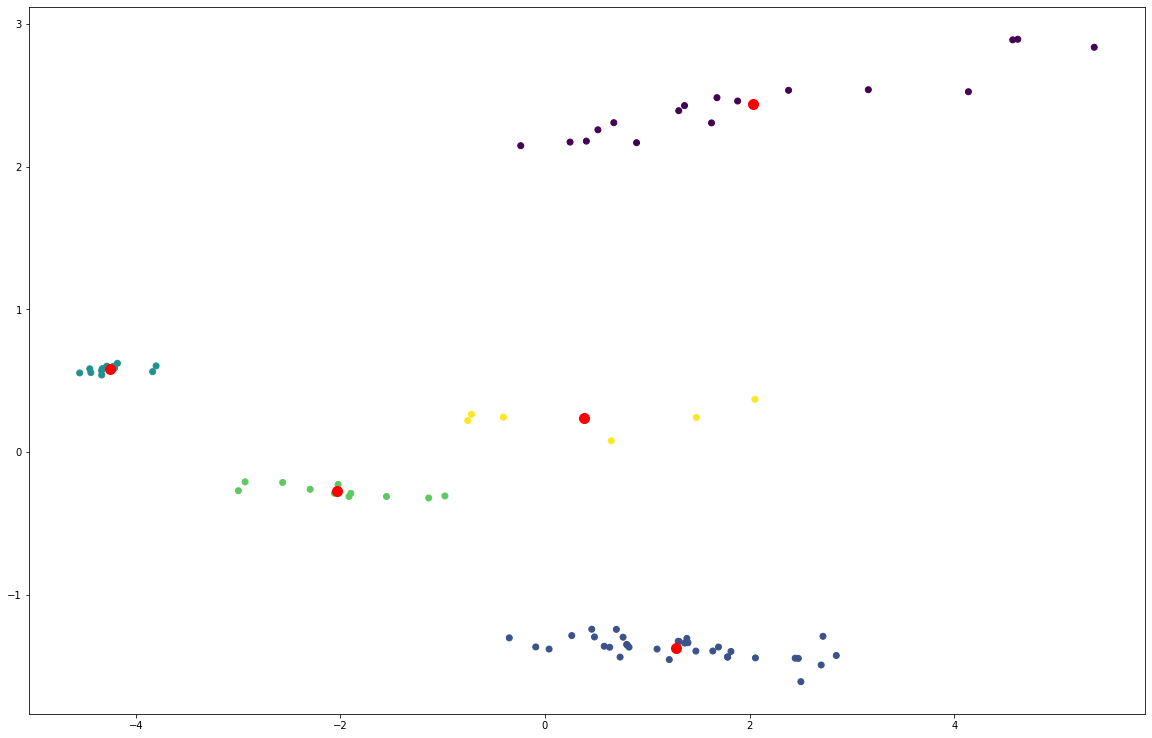

In [0]:
fig, ax = plt.subplots(figsize=(20, 13)) 

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=350, n_init=10, random_state=0)

km_clusters = kmeans.fit_predict(pca_components)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

plt.show()

In [0]:
print("Rand Index of the Kmeans solution: {}"
      .format(rand_index_score(y, k_clusters)))
print("Adjusted Rand Index of the Kmeans solution: {}"
      .format(metrics.adjusted_rand_score(y, km_clusters)))
print("The silhoutte score of the Kmeans solution: {}"
      .format(metrics.silhouette_score(X_std, km_clusters, metric='euclidean')))

Rand Index of the Kmeans solution: 1.0
Adjusted Rand Index of the Kmeans solution: 1.0
The silhoutte score of the Kmeans solution: 0.7142808385581949


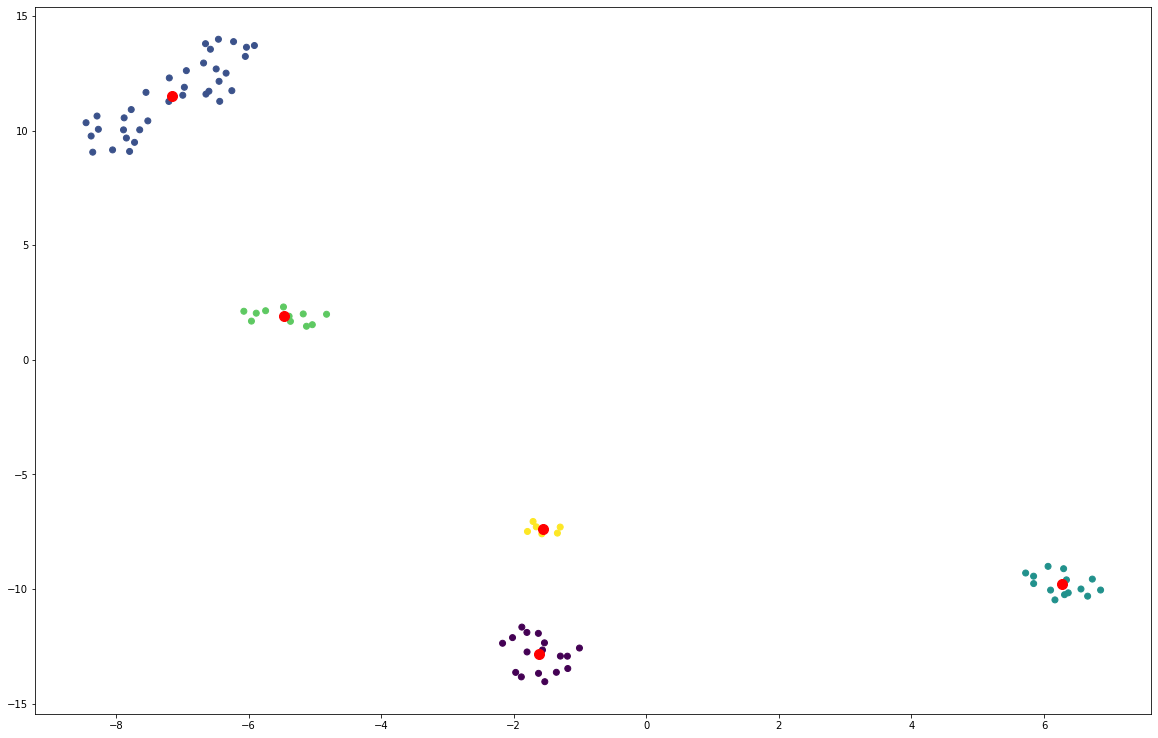

In [0]:
fig, ax = plt.subplots(figsize=(20, 13)) 

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=350, n_init=10, random_state=0)

umap_clusters = kmeans.fit_predict(umap_results)

plt.scatter(umap_results[:, 0], umap_results[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')

plt.show()

In [0]:
print("Rand Index of the UMAP solution: {}"
      .format(rand_index_score(y, umap_clusters)))
print("Adjusted Rand Index of the UMAP solution: {}"
      .format(metrics.adjusted_rand_score(y, umap_clusters)))
print("The silhoutte score of the UMAP solution: {}"
      .format(metrics.silhouette_score(X_std, umap_clusters, metric='euclidean')))

Rand Index of the UMAP solution: 1.0
Adjusted Rand Index of the UMAP solution: 1.0
The silhoutte score of the UMAP solution: 0.7142808385581949


In [0]:
kmean= KMeans(5, random_state=123)
kmean.fit(pca_components)
labels=kmean.labels_

In [0]:
clusters=pd.concat([X, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Weight,Length1,Length2,Length3,Height,Width,species_Bream,species_Parkki,species_Pike,species_Smelt,species_Whitefish,cluster
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1.0,0.0,0.0,0.0,0.0,0.0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1.0,0.0,0.0,0.0,0.0,0.0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1.0,0.0,0.0,0.0,0.0,0.0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1.0,0.0,0.0,0.0,0.0,0.0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1.0,0.0,0.0,0.0,0.0,0.0


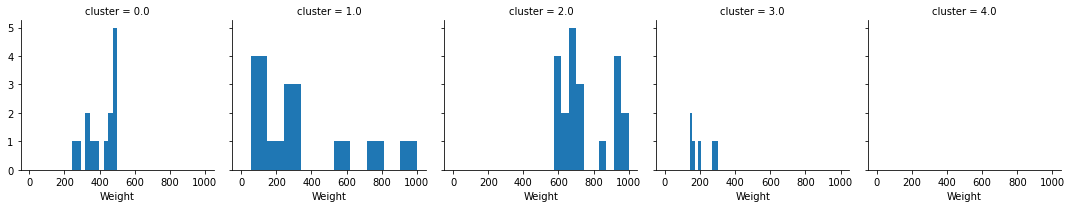

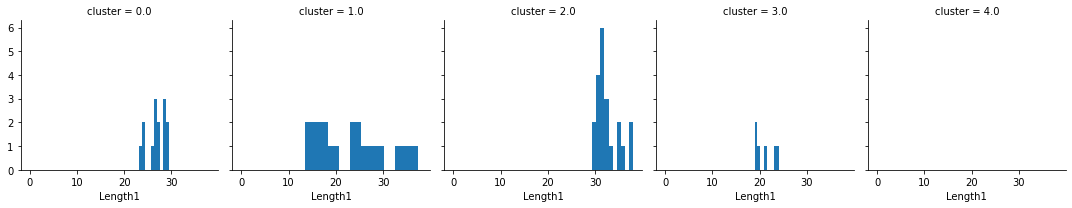

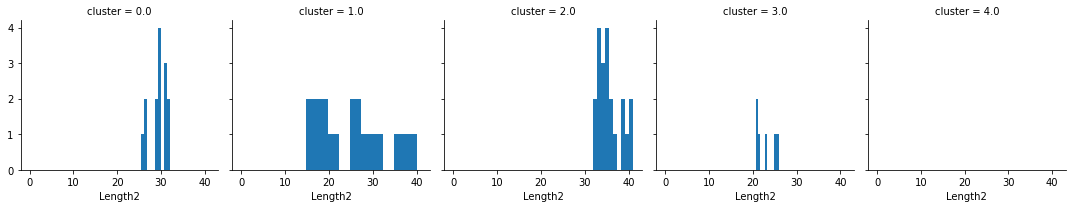

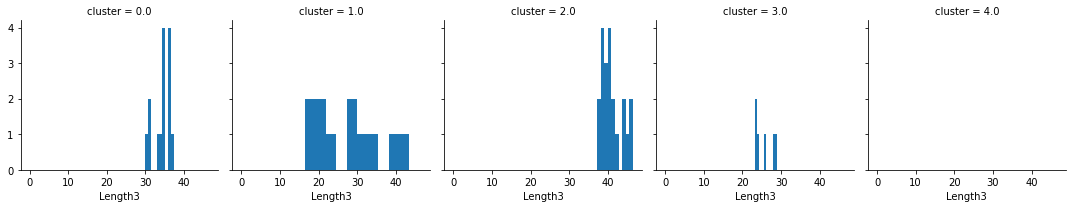

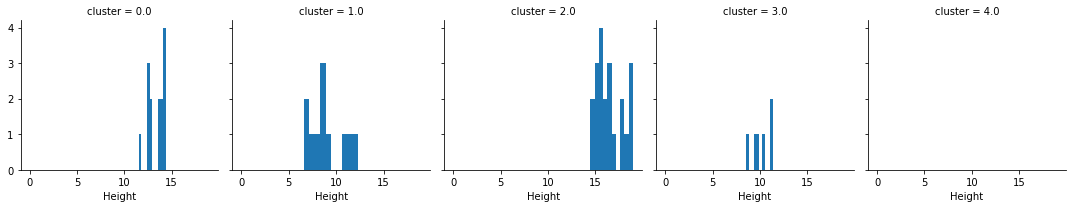

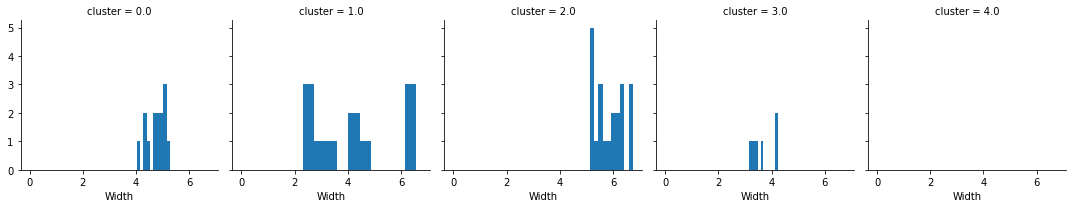

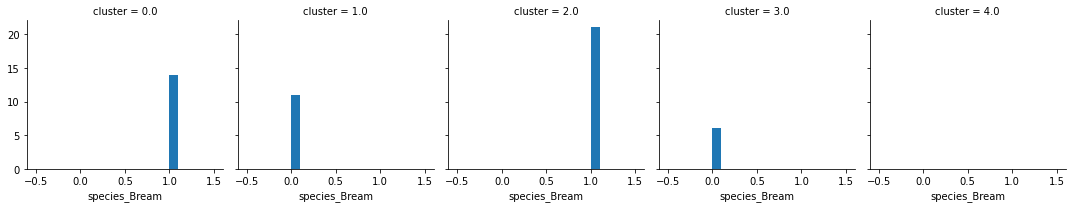

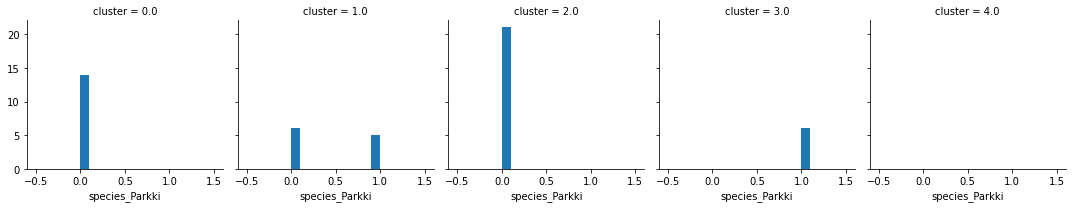

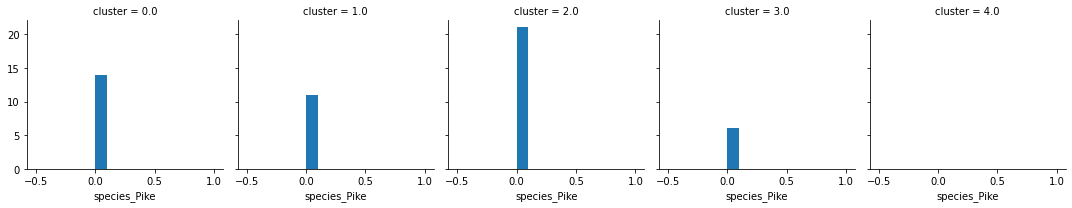

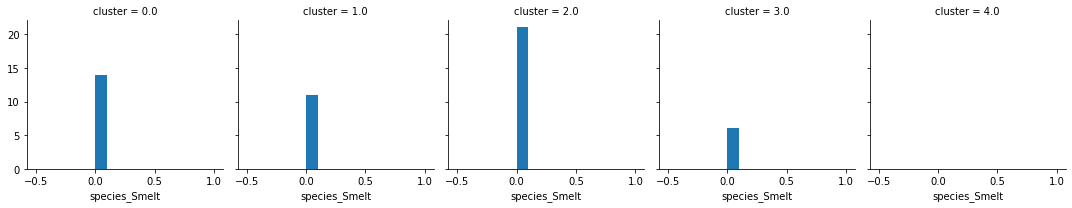

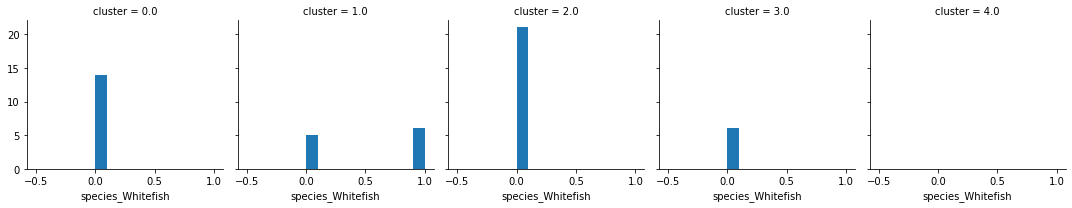

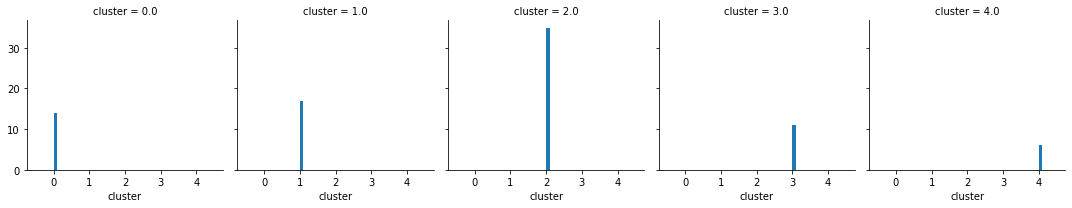

In [0]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [0]:
import math
from sklearn.metrics.pairwise import cosine_similarity

dist =  (pca_components)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(83, 2)

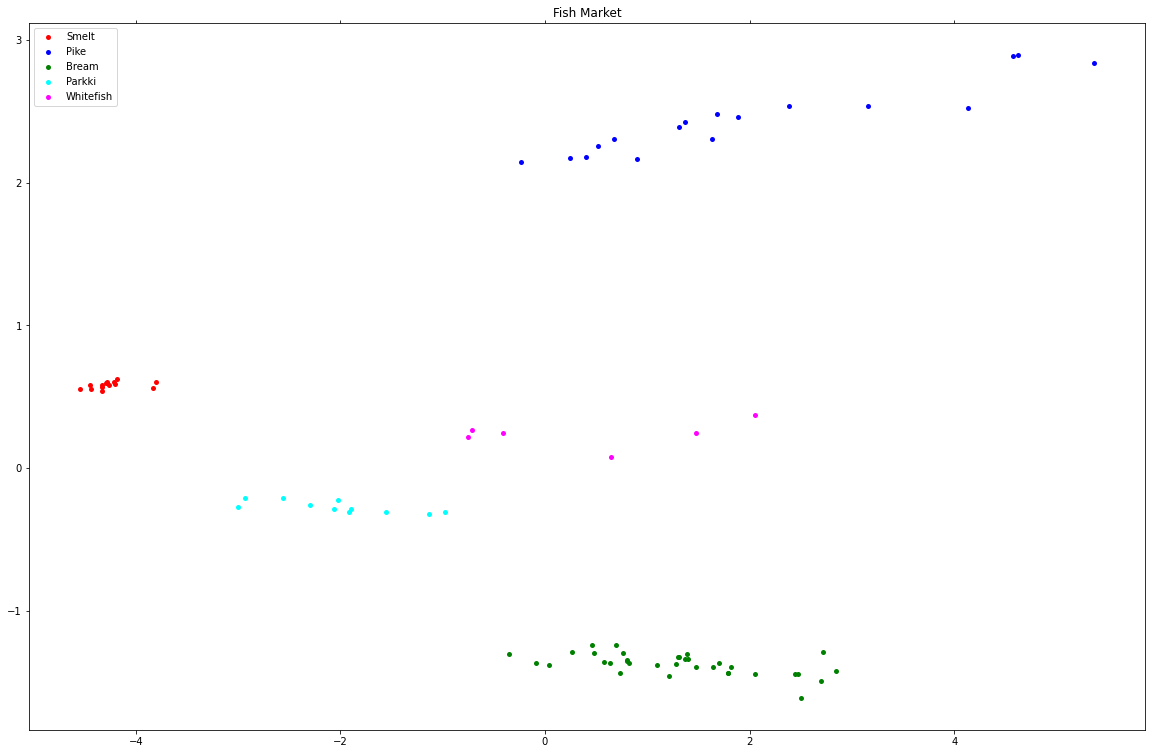

In [0]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green',
          3: 'cyan',
          4:'magenta'}

names = {0: 'Smelt', 
         1: 'Pike',
         2: 'Bream',
         3: 'Parkki',
         4:'Whitefish'}


df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Fish Market")
plt.show()    

In [0]:
y= species

In [0]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
dbclusters = dbscan_cluster.fit_predict(X_std)

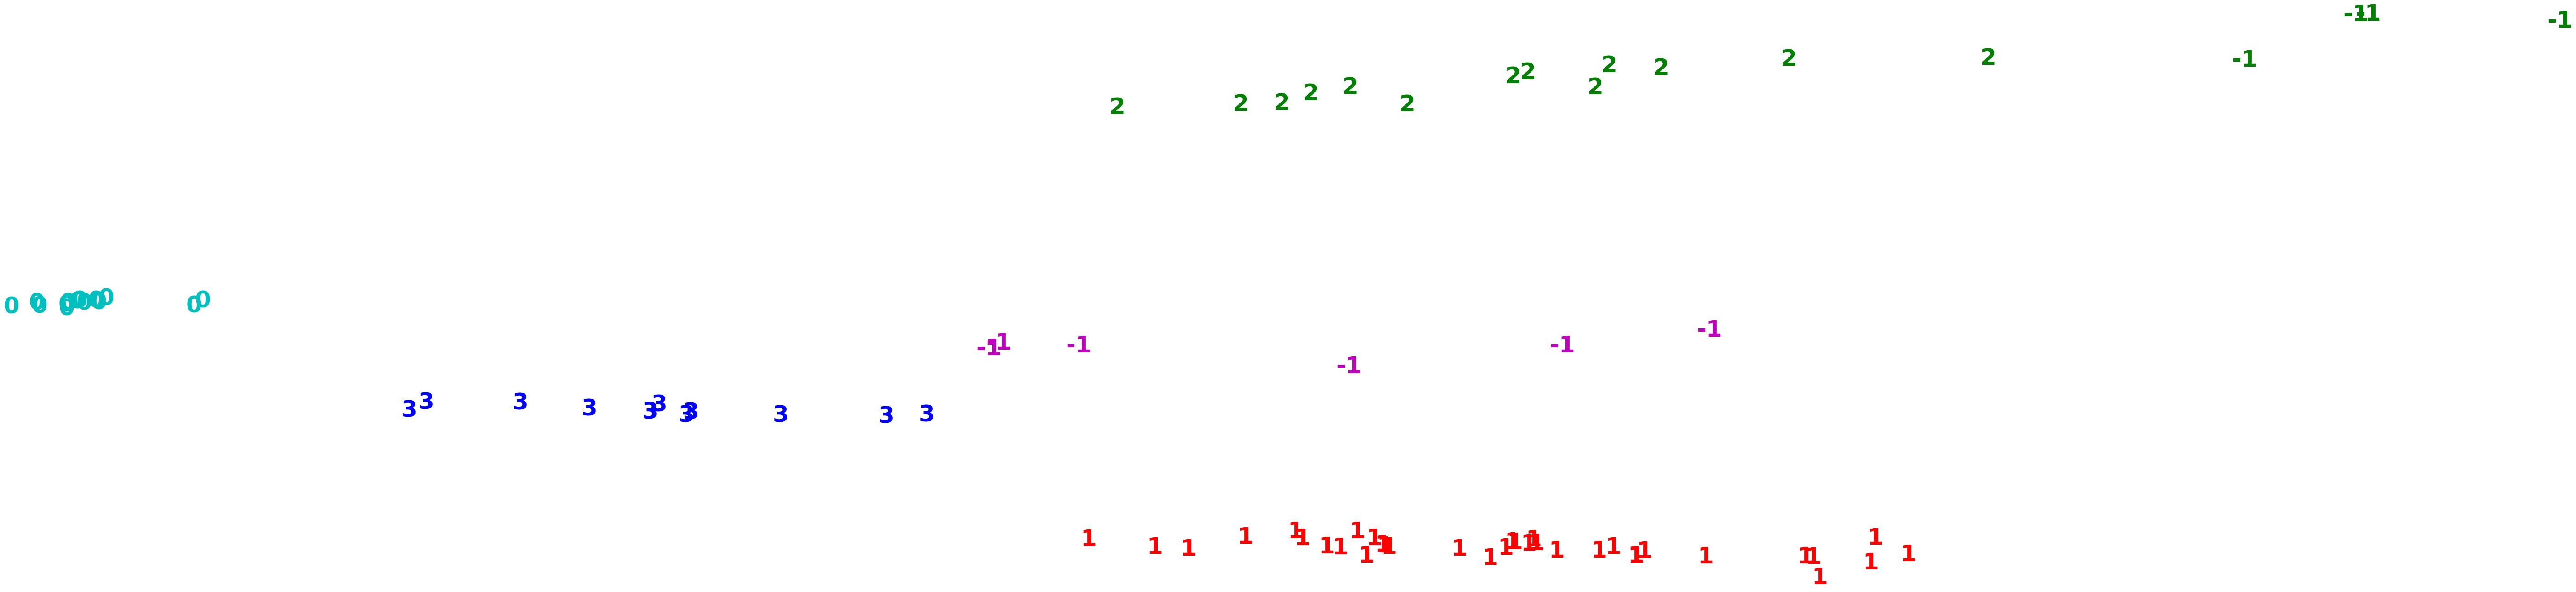

In [0]:
dbpca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgcmy'
for i in range(dbpca.shape[0]):
    plt.text(dbpca[i, 0], dbpca[i, 1], str(dbclusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
print("Adjusted Rand Index of the DBscan solution: {}"
      .format(metrics.adjusted_rand_score(y, dbclusters)))
print("The silhoutte score of the DBscan solution: {}"
      .format(metrics.silhouette_score(X_std, dbclusters, metric='euclidean')))

Adjusted Rand Index of the DBscan solution: 0.9416754692744637
The silhoutte score of the DBscan solution: 0.6746289493774454


In [0]:
# Standarizing the features
y = species

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [0]:

from sklearn.mixture import GaussianMixture

# Defining the agglomerative clustering
gmm_cluster = GaussianMixture(n_components=4, random_state=123)

# Fit model
gmm_clusters = gmm_cluster.fit_predict(X_std)

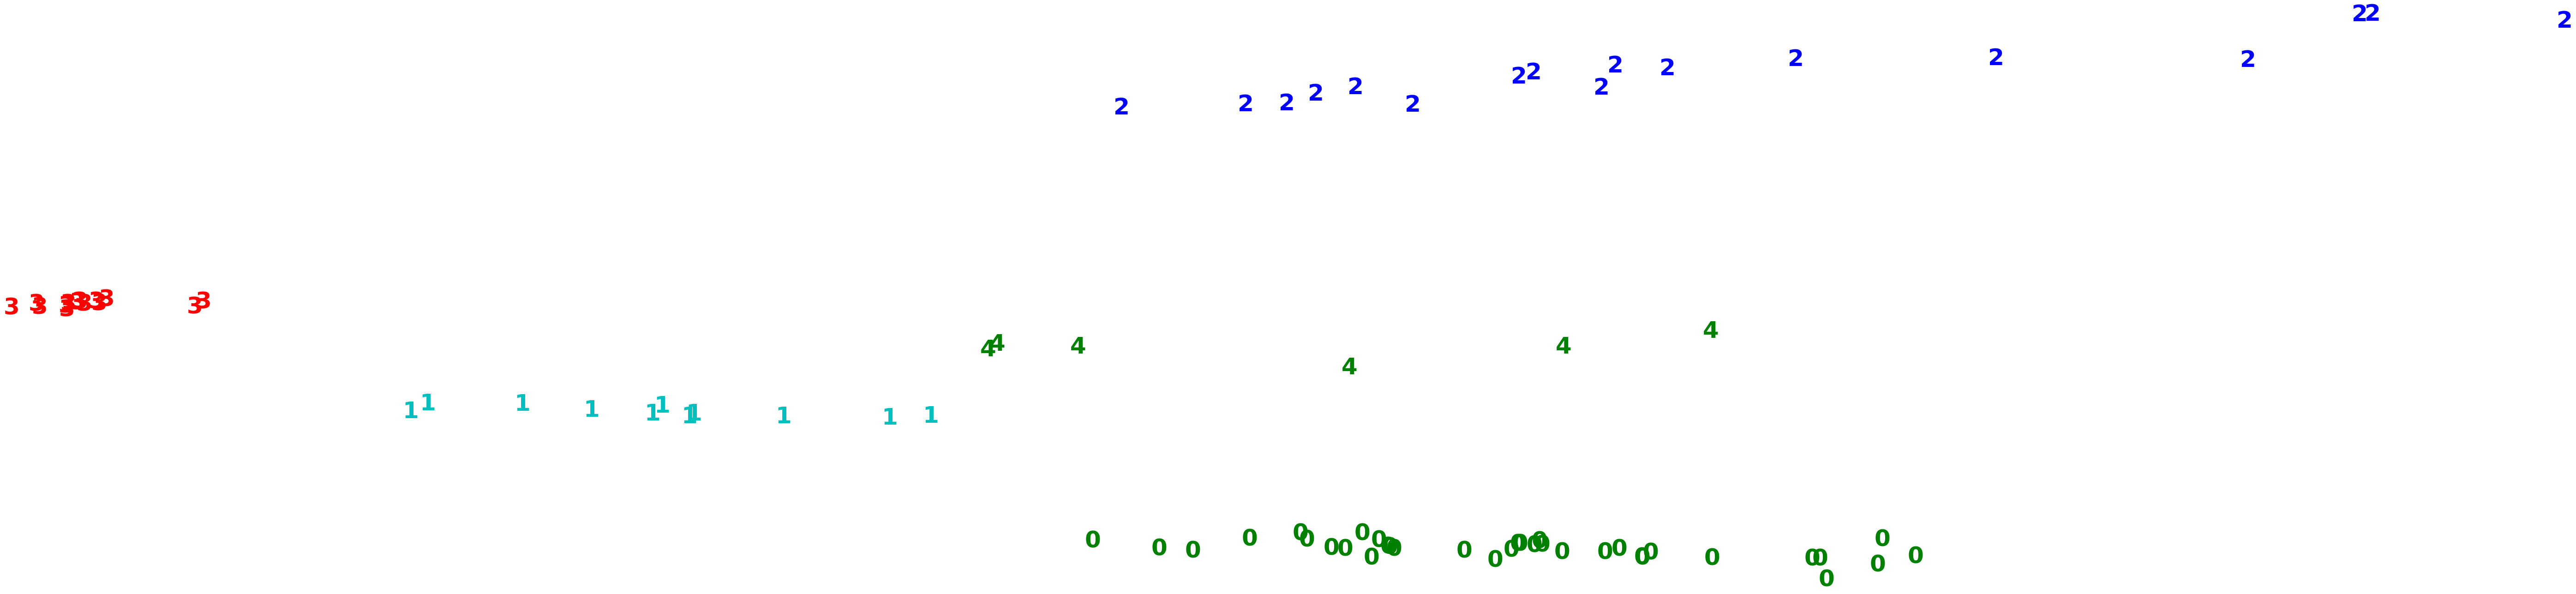

In [0]:
# plt.text(pca[i, 0], pca[i, 1], str(clusters[i]), 
#             color=colours[y[i]],
   

pca = PCA(n_components=3).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbgcmy'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y[i]), 
             color=colours[gmm_clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [0]:
print("Rand Index of the Kmeans solution: {}"
      .format(rand_index_score(y, k_clusters)))
print("Adjusted Rand Index of the GMM solution: {}"
      .format(metrics.adjusted_rand_score(y, gmm_clusters)))
print("The silhoutte score of the GMM solution: {}"
      .format(metrics.silhouette_score(X_std, gmm_clusters, metric='euclidean')))

Rand Index of the Kmeans solution: 1.0
Adjusted Rand Index of the GMM solution: 0.8517246401890276
The silhoutte score of the GMM solution: 0.6300449064347111


# Conclusions




---



---




---


This fishmarket dataset is able to be seperated out to 4 different clusters. The measurements of Weight, Length, Height and Width are usable to seperate different species of fish. Deploying to to an automated fish sorting machine would be useful to a fish market or fishery that needs to sort a giant lot of fish into different bins. It would not require manual labor. Adding more attributes to this sorter would allow it to handle a more diverse collection of fish.  
 




---


---



---





